In [20]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [22]:
houses = pd.read_pickle('data/response_houses.pkl')
houses.columns = ['h_'+str(column) if column != 'RegionName' else column for column in houses.columns]
rental = pd.read_pickle('data/response_rental.pkl')
rental.columns = ['r_'+str(column) if column != 'RegionName' else column for column in rental.columns]

In [23]:
rental.head()

,RegionName,r_agg_2011,r_agg_2015_adj,r_pct_delta
0,11368,1.868000,2.188278,1.171455
1,79936,0.744167,0.694379,0.933096
2,60629,1.197000,1.180207,0.985971
3,90650,1.524333,1.640026,1.075898
4,11226,1.014000,1.277783,1.260141


In [24]:
houses.head()

,RegionName,h_agg_2011,h_agg_2015_adj,h_pct_delta
0,11368,373.833333,431.274105,1.153653
1,79936,80.333333,75.060164,0.934359
2,60629,107.166667,113.430961,1.058454
3,90650,228.750000,292.549418,1.278905
4,11226,309.166667,416.876846,1.348389


In [25]:
df = rental.merge(houses, on='RegionName')
df.head()

,RegionName,r_agg_2011,r_agg_2015_adj,r_pct_delta,h_agg_2011,h_agg_2015_adj,h_pct_delta
0,11368,1.868000,2.188278,1.171455,373.833333,431.274105,1.153653
1,79936,0.744167,0.694379,0.933096,80.333333,75.060164,0.934359
2,60629,1.197000,1.180207,0.985971,107.166667,113.430961,1.058454
3,90650,1.524333,1.640026,1.075898,228.750000,292.549418,1.278905
4,11226,1.014000,1.277783,1.260141,309.166667,416.876846,1.348389


In [29]:
df['ratio_2011'] = df['h_agg_2011'] / df['r_agg_2011']
df['ratio_2015'] = df['h_agg_2015_adj'] / df['r_agg_2015_adj']
df['ratio_pct_delta'] = df['ratio_2015'] / df['ratio_2011']
df.head()

,RegionName,r_agg_2011,r_agg_2015_adj,r_pct_delta,h_agg_2011,h_agg_2015_adj,h_pct_delta,ratio_2011,ratio_2015,ratio_pct_delta
0,11368,1.868000,2.188278,1.171455,373.833333,431.274105,1.153653,200.124911,197.083754,0.984804
1,79936,0.744167,0.694379,0.933096,80.333333,75.060164,0.934359,107.950728,108.096860,1.001354
2,60629,1.197000,1.180207,0.985971,107.166667,113.430961,1.058454,89.529379,96.111037,1.073514
3,90650,1.524333,1.640026,1.075898,228.750000,292.549418,1.278905,150.065602,178.380911,1.188686
4,11226,1.014000,1.277783,1.260141,309.166667,416.876846,1.348389,304.898093,326.250103,1.070030


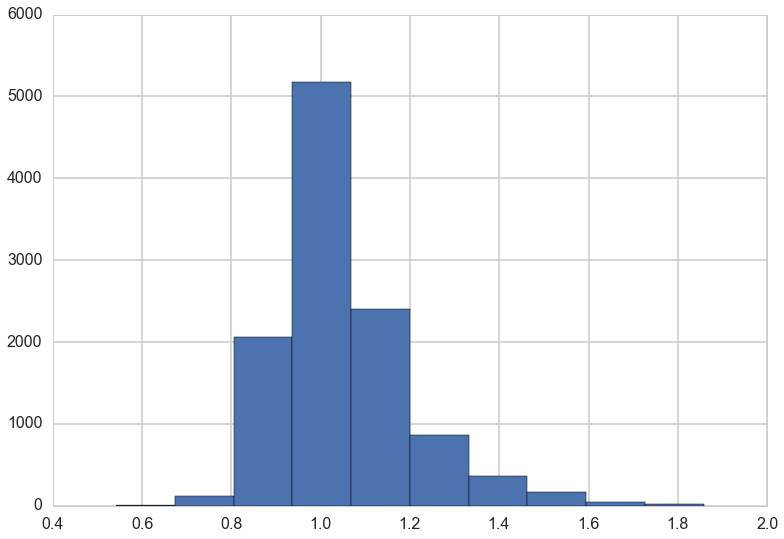

In [36]:
plt.hist(df['ratio_pct_delta'].dropna().tolist());
plt.title('Histogram of Change in Ratio');

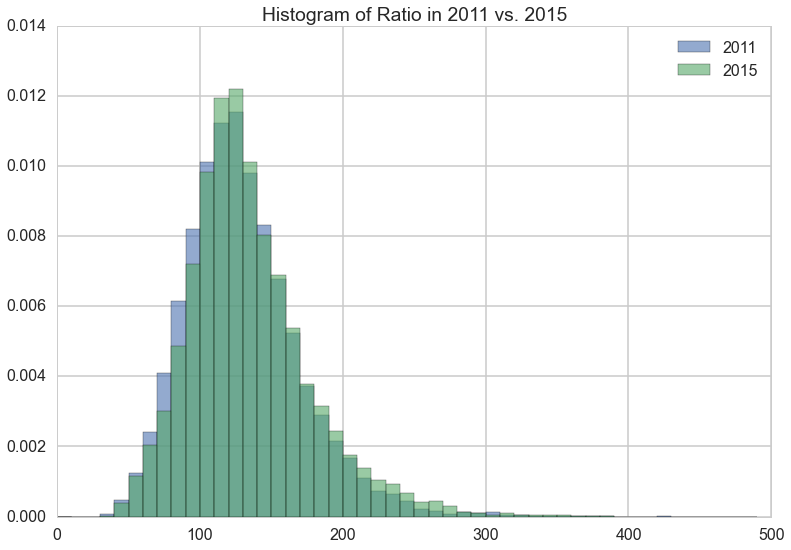

In [53]:
setbins = range(0,500,10)
plt.hist(df['ratio_2011'].dropna().tolist(), bins = setbins, normed=True, alpha=0.6, label='2011');
plt.hist(df['ratio_2015'].dropna().tolist(), bins = setbins, normed=True, alpha=0.6, label='2015');
plt.title('Histogram of Ratio in 2011 vs. 2015\n');
plt.legend();

In [52]:
sum(np.isnan(df['ratio_2015']))

0

In [54]:
df.to_pickle('housing_rental_ratio.pkl')